<a href="https://colab.research.google.com/github/TomasRipsky/Ai-Collab/blob/Supervised_Algorithms/SupervisedAlgorithmRipsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


-IMPORT LIBRARIES
-LOAD DATA
-TRAIN AND TEST DATA
-ALGORITHM (KNN, DESICION TREE, SVM)
  -INIT
  -FIT
  -PREDICT
  -SCORE, METRICS


# DESICION TREE


In [ ]:
# DESICION TREE
# HERE WE DO THE NECESSARY IMPORTS IN ORDER TO USE THE NEEDED LIBRARIES TO SOLVE THE PROBLEM

import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# THE FIRST STEP IN ORDER TO THIS KIND PROBLEM IS TO READ THE DATA BASE (IN THIS CASE THE IRIS DATA BASE)
# THEN WE NEED TO SPLIT THE INFORMATION IN ORDER TO HAVE SEPARATED PORTIONS OF THE DATA BASE TO TRAIN (X AND Y TRAIN) AND VALIDATE (X AND Y TEST) OUR MODEL

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   #READING
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
iris = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')

x_train, x_test, y_train, y_test = train_test_split(iris.drop(labels='iris_class', axis=1),iris.iloc[:,4], test_size=0.3,random_state=1) #SPLITING

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth =  1


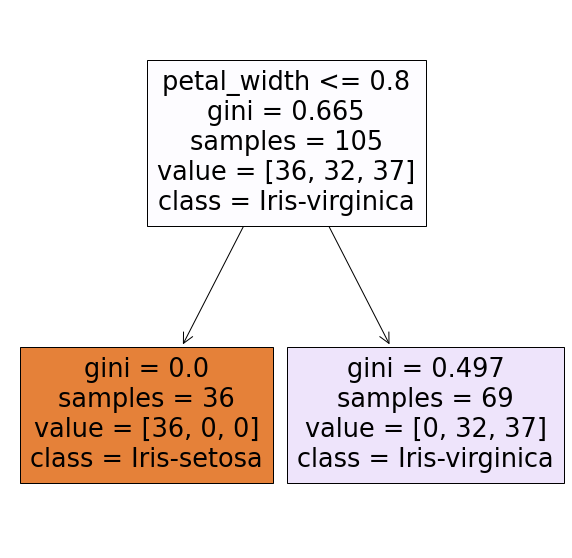

[[14  0  0]
 [ 0  0 18]
 [ 0  0 13]]
max_depth =  2


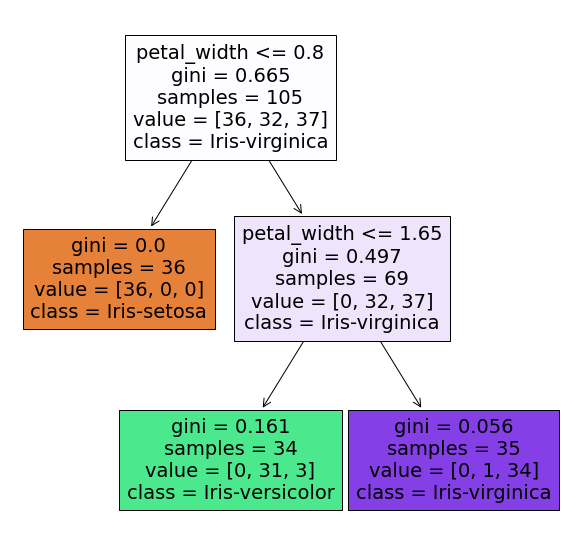

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
max_depth =  3


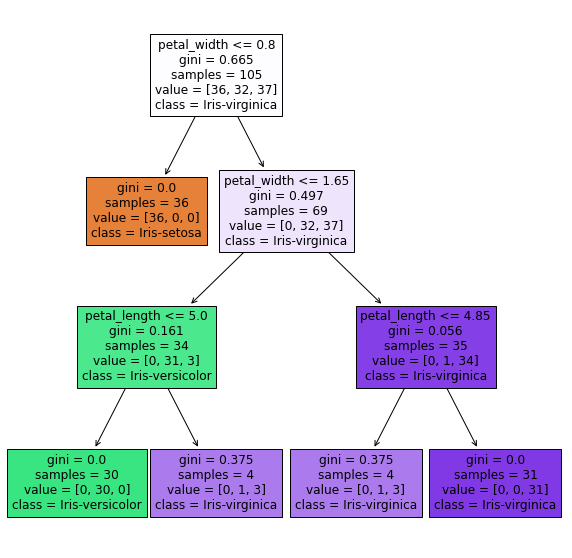

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
max_depth =  4


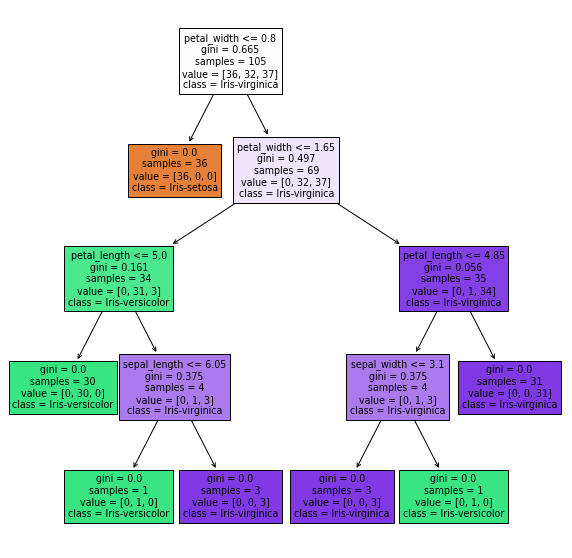

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
max_depth =  5


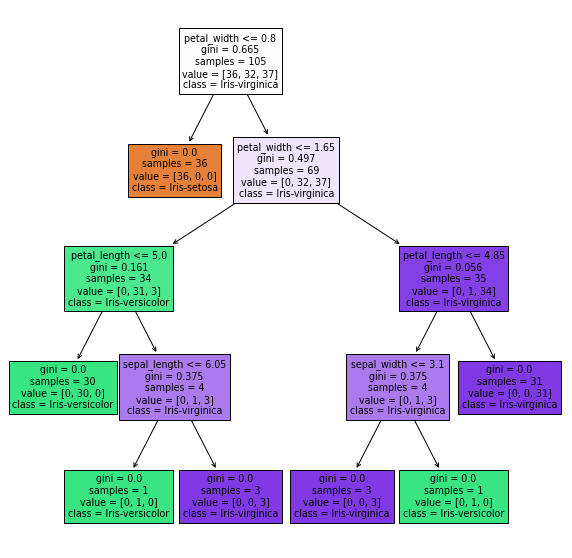

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [ ]:
# THE SECOND STEP IN ORDER TO SOLVE THIS PROBLEM IS TO GENERATE THE MODEL
# AFTER THAT WE ARE GOING TO FIT THE DATA INTO TO MODEL TO PREVIOUSLY USE IT TO DO PREDICTIONS
# WE USE THE MODEL WITH THE DATA TO PREDICT AND WE PLOT IT SO WE CAN SHOW IT
# ALL THIS PROCESS IS DONE INSIDE A FOR TO BE ABLE TO GENERATE TREES WITH DIFFERENT DEPTHS IN ORDER TO CHOOSE THE ONE WITH THE BEST DEPTH THAT SOLVES CORRECTLY OUR PROBLEM

all_metrics = [] # ALL THE METRICS NEEDED TO EVALUATE THE BEHAVIOUR OF OUR MODEL ARE GOING TO BE STORED HERE
max_tree_depth =  [1, 2, 3, 4, 5] # WE ARBITRARY SELECT A MAX DEPTH FOR OUR TREE (THE AMOUNT OF LEVEL THAT WE WANT STARTING FROM 0)

for nm in max_tree_depth:
  modelDT2 = DecisionTreeClassifier(max_depth = nm,random_state = 1) #WE GENERATE THE MODEL FOR EACH DEPTH IN THE CICLE
  modelDT2 = modelDT2.fit(x_train, y_train) # WE FIT THE INFORMATION IN THE MODEL
  y_prediction = modelDT2.predict(x_test)   # USE THE MODEL TO MAKE THE PREDICTIONS

  all_metrics.append({'nm':nm,'accuracy':accuracy_score(y_test,y_prediction),
                       'precision':precision_score(y_test,y_prediction, average="weighted"),
                       'recall':recall_score(y_test,y_prediction, average="weighted"),
                       'f1':f1_score(y_test,y_prediction, average="weighted")})
  # WE SELECT TE METRICS THATH WE ARE GOING TO USE TO EVALUATE THE BEHAVIOUR OF OUR MODEL

  print('max_depth = ',nm)
  plt.figure(figsize=(10,10))
  tree.plot_tree(modelDT2, feature_names = iris.columns, class_names = iris['iris_class'].unique(), filled = True)
  plt.show()
  # WE PLOT THE MODEL IN ORDER TO SHOW IT

  #WE PRINT THE CONFUSION MATRIX TO SHOW HOW THE DATA WAS CLASIFIED BY THE MODEL IN EACH ITERATION
  print(confusion_matrix(y_test,y_prediction))

all_metrics = pd.DataFrame(pd.DataFrame(all_metrics).set_index('nm').unstack()).reset_index()
all_metrics.columns = ['metric','max_depth','value']



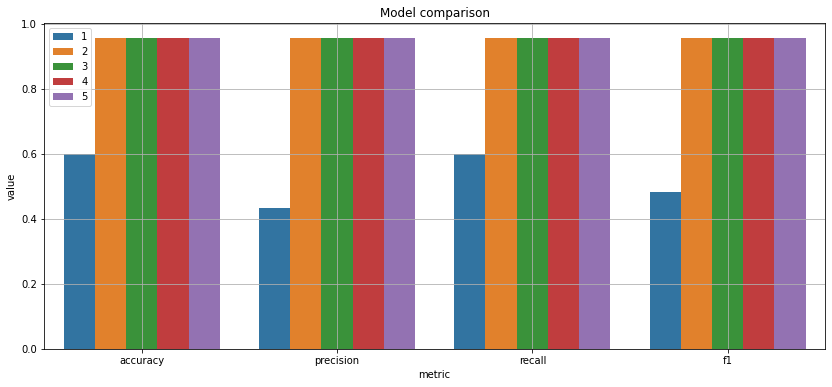


        metric  max_depth     value
0    accuracy          1  0.600000
1    accuracy          2  0.955556
2    accuracy          3  0.955556
3    accuracy          4  0.955556
4    accuracy          5  0.955556
5   precision          1  0.432258
6   precision          2  0.955556
7   precision          3  0.955556
8   precision          4  0.955556
9   precision          5  0.955556
10     recall          1  0.600000
11     recall          2  0.955556
12     recall          3  0.955556
13     recall          4  0.955556
14     recall          5  0.955556
15         f1          1  0.481818
16         f1          2  0.955556
17         f1          3  0.955556
18         f1          4  0.955556
19         f1          5  0.955556


In [ ]:
# WE DISPLAY THE RESULTS IN TWO DIFFERENT WAYS

# FIRST WE CREATE A CHART TO EVALUATE THE MODEL WITH THE DIFFERENT DEPTHS AND PLOT IT TO SHOW IT
plt.figure(figsize = (14,6))
sns.barplot(data = all_metrics,x = 'metric',y = 'value',hue = 'max_depth')
plt.title('Model comparison')
plt.legend(loc='best')
plt.grid()
plt.show()

#SECOND WE SHOW THE ALL_METRICS
print("\n",all_metrics)

# KNN

In [ ]:
# KNN

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#WE READ THE IRIS DATA BASE
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   #READING
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
iris = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')

all_metrics = [] # ALL THE METRICS NEEDED TO EVALUATE THE BEHAVIOUR OF OUR MODEL ARE GOING TO BE STORED HERE
n_neighbors =  [2, 4, 6, 8, 10,12,14,16,18,20] # WE ARBITRARY SELECT AN AMOUNT OF NEIGHBORS (the number of nodes to compare each other node to)

x_train, x_test, y_train, y_test = train_test_split(iris.drop(labels='iris_class', axis=1),iris.iloc[:,4], test_size=0.3,random_state=1) #SPLITING THE DATA

for nm in n_neighbors:
  knn = neighbors.KNeighborsClassifier(n_neighbors = nm) #WE GENERATE THE MODEL FOR EACH AMOUNT OF NEIGHBORS
  knn = knn.fit(x_train, y_train) # WE FIT THE INFORMATION IN THE MODEL
  y_prediction = knn.predict(x_test)   # USE THE MODEL TO MAKE THE PREDICTIONS

  all_metrics.append({'nm':nm,'accuracy':accuracy_score(y_test,y_prediction),
                       'precision':precision_score(y_test,y_prediction, average="weighted"),
                       'recall':recall_score(y_test,y_prediction, average="weighted"),
                       'f1':f1_score(y_test,y_prediction, average="weighted")}) # WE SELECT TE METRICS THat WE ARE GOING TO USE TO EVALUATE THE BEHAVIOUR OF OUR MODEL

  print("\n",confusion_matrix(y_test,y_prediction)) #WE PRINT THE CONFUSION MATRIX FOR EACH AMOUNT OF NEIGHBORS (1 TO 5)

all_metrics = pd.DataFrame(pd.DataFrame(all_metrics).set_index('nm').unstack()).reset_index()
all_metrics.columns = ['metric','n_neighbors','value']

#WE SHOW THE METRICS FOR EACH AMOUNT OF NEIGHBORS IN ORDER TO KNOW WHICH ONE IS THE BEST OPTION
print("\n",all_metrics)


 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]

 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]

 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]

 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

        metric  n_neighbors     value
0    accuracy            2  0.977778
1    accuracy            4  0.977778
2    accuracy            6  0.977778
3    accuracy            8  0.977778
4    accuracy           10  0.977778
5    accuracy           12  0.977778
6    accuracy           14  0.977778
7    accuracy           16  0.977778
8    accuracy           18  0.977778
9    accuracy           20  0.977778
10  precision            2  0.978947
11  precision            4  0.978947
12  precision            6  0.978947
13  precision            8  0.979365
14  precision           10  0.979365
15  precision   

# SVM


In [ ]:
# SUPPORT VECTOR MACHINE

#CORRESPONDING IMPORTS
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#WE READ THE IRIS DATA BASE
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   #READING
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
iris = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')

all_metrics = []

x_train, x_test, y_train, y_test = train_test_split(iris.drop(labels='iris_class', axis=1),iris.iloc[:,4], test_size=0.25,random_state=1) #SPLITING THE DATA

for k in ['linear','poly', 'rbf','sigmoid']:

  clf = svm.SVC(kernel = k) #WE GENERATE THE CLASSIFIER FOR EACH KIND OF KERNEL

  clf.fit(x_train, y_train) #WE FIT THE DATA INTO THE MODEL

  prediction = clf.predict(x_test) #WE MAKE PREDICTIONS USING THE MODEL

  print("\n",confusion_matrix(y_test,prediction)) #WE PRINT THE CONFUSION MATRIX FOR EACH CLASSIFIER

  print("\n",f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, prediction)}\n") #WE SHOW A REPORT WITH THE METRICS OF EACH CLASSIFIER






 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]

 Classification report for classifier SVC(kernel='linear'):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

 Classification report for classifier SVC(kernel='poly'):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CONCLUSIONS

With the information presented in this document we can reach the following conclusions.

In order to evaluate each algorithm we have to focuse in every aspect that determines which one is the best, this aspects are performance, transparency and Metrics.

* Talking about **transparency** the best algorithm is the desicion tree, we can clearly see how it is functioning and the decisions that it makes in order to reach the conclusions given. Ones we plot it it is really easy to understand and to follow it's behaviour, that´s why i consider that in this sense this is the best one. On the other hand we have the svm that is almost a complete "black box" and we cannot clearly understand it´s behaviour, for me in this aspect SVM is the worst one. And somewhere in the middle is the KNN it is not as simple to understand as the desicion tree but ones you get the concept of neighbor and how the algorithm use it to clasificate each node it is very understandable, and if you plot it and show it its even more clear.

* **Performance** as far as performance is concerned the one that needs the most powerfull hardware in order to function is the SVM because  their compute and storage requirements increase rapidly with the number of training vectors, this implies that this algorithm is not going to be very usefull if we want to scale it or if we dont have a really powerfull hardware. If we talk about the knn algorithm is not so demanding as the previous one but it´s own nature requieres proccesing that can be more and more demanding depending on the sample, this algorithm works calculating the distance between the test sample and all training samples using the Euclidian distance, so depending on the sample we could need more o less processing power. On the other hand there is the desicion tree which of the ones presented here is the most simple and the one that means the less stress to the machine that it is executing it.

* **Metrics** if we want to talk about results purely, in this problem we have a clear winner, the support vector machine (SVM) with perfect results in one type of kernel and pretty close to perfection with other kernels, with a result of around 98% in the other metrics (for exact result go to the classification report) except for the "sigmoid" kernel that seems to not be apropiate for this kind of problems as we see that reflected in really poor metrics, in second place we have the KNN algorithm whose metrics with 8 or more neighbors (up to 20 in this example) are around 97.7% to 97.9% in precision and accuracy as we show earlier in the scores. Lastly we have the desicion tree, if you choose shallow depth the metrics shows that the algorithm is almost useless for this kind of problem but once we choose the correct amount of depth we can see that it has a pretty good behaviour hovering around 95% in accuracy and precision, the least powerfull but still a decent behaviour.


To conlude we cannot choose the best algorithm it depends on the needs of each user, each one has it´s pros and cons, are better in one aspect or worst in another, with the information presented before you can choose the one that better suits you.

